In [64]:
from corsikaio import CorsikaParticleFile
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt

MUON_MASS = 105.661e-3 # GeV
ELEC_MASS = 0.5101e-3 # GeV

# Dictionary associating particle mass to particle ID number 
mass_lept_dict = {
    1 : 0.0, 
    2 : ELEC_MASS, 
    3 : ELEC_MASS, 
    5 : MUON_MASS, 
    6 : MUON_MASS
}

part_id_lept = {1 : 'gamma', 2 : 'e+', 3 : 'e-',
          5 : 'mu+', 
          6 : 'mu-',
          }

id_list = part_id_lept.keys()

In [65]:
a = 7.1
a in part_id_lept.keys()

False

In [66]:
with CorsikaParticleFile("/Users/workspace/Software/Pierre_Tank/CORSIKA_Showers/IceCube/DAT603477") as f:
    for event in f:
        print(1)
        print(blocks)

1
ParticleEvent(header=np.void((b'EVTH', 1.0, 14.0, 1043581.25, 0.0, 0.0, -1996844.1, -15791.084, 386001.7, 969440.6, 0.3792148, 1.6116829, 3.0, [[1603477.0, 0.0, 0.0], [1603478.0, 0.0, 0.0], [1603479.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], 603477.0, 231219.0, 7.75, 1.0, [284000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], -1.0, 1000000.0, 1258925.4, 0.05, 0.05, 0.01, 0.002, 0.0, 1.0, 0.0, 1.0, 0.0, 2.0, 16.75, -51.96, 1.0, 0.0, 3.0, 2.0, 0.0, 1.0, 2.0, 3.0, 0.0, 65.0, 0.0, 359.99, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.1066124, 1.0, 1.0, 0.0, 0.0, 0.0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 4.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 200000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 80.0, 0.0, 0.0, 11279970.0, 1.0, 0.0, 0.0, 0.0, 0

In [67]:
GROUND_LEVEL = 1
M_PROTON = 0.938272  # GeV/c^2

## Particles are stored separately for each observation level.
## The level number is encoded in the unit digit of the particle ID in the .DAT file
## Observation Level Number:
## obs_level = N % 10
## (The last digit)
## 
## Hadronic Generation:
## hadr_gen = (N // 10) % 100
## (Remove the last digit, then take the next two digits)
## 
## Particle ID:
## part_id = N // 1000
## (Remove last three digits)

energy_gamma = []
energy_elec = []
energy_mu = []

x_coor = [] 
y_coor = []

with CorsikaParticleFile("/Users/workspace/Software/Pierre_Tank/CORSIKA_Showers/IceCube/DAT603477") as f:
    for event in f:
        print('Energy\tPart ID\tZenith\tAzimuth')
        print(event.header['total_energy'],'\t',event.header['particle_id'],'\t', event.header['zenith'],'\t', event.header['azimuth'])
        print(event.header.dtype)
        print(event.particles.dtype)

        for part in event.particles:
            pid = part['particle_description'] // 1000 # integer division (or floor division), returns only  the integer part of the division 
            obs_lvl = part['particle_description'] % 10   # Modulus operation 

            if(obs_lvl == GROUND_LEVEL and int(pid) in id_list): # Modulus operation 
                ptot = np.sqrt(part['px']**2 + part['py']**2 + part['pz']**2)
                mass = mass_lept_dict[pid]
                ekin = np.sqrt(ptot**2 + mass**2) - mass 
                if(pid==1): energy_gamma.append(ekin)
                if(pid==2 or pid==3): energy_elec.append(ekin)
                if(pid==5 or pid==6): energy_mu.append(ekin)

                x_coor.append(part['x'])
                y_coor.append(part['y'])


Energy	Part ID	Zenith	Azimuth
1043581.25 	 14.0 	 0.3792148 	 1.6116829
{'names': ['event_header', 'event_number', 'particle_id', 'total_energy', 'starting_altitude', 'first_target_id', 'first_interaction_height', 'momentum_x', 'momentum_y', 'momentum_minus_z', 'zenith', 'azimuth', 'n_random_sequences', 'random_seeds', 'run_number', 'date', 'version', 'n_observation_levels', 'observation_height', 'energy_spectrum_slope', 'energy_min', 'energy_max', 'energy_cutoff_hadrons', 'energy_cutoff_muons', 'energy_cutoff_electrons', 'energy_cutoff_photons', 'nflain', 'nfdif', 'nflpi0', 'nflpif', 'nflche', 'nfragm', 'earth_magnetic_field_x', 'earth_magnetic_field_z', 'egs4_flag', 'nkg_flag', 'low_energy_hadron_model', 'high_energy_hadron_model', 'cerenkov_flag', 'neutrino_flag', 'curved_flag', 'computer', 'theta_min', 'theta_max', 'phi_min', 'phi_max', 'cherenkov_bunch_size', 'n_cherenkov_detectors_x', 'n_cherenkov_detectors_y', 'cherenkov_detector_grid_spacing_x', 'cherenkov_detector_grid_spacing

Total number of particles:  2467724
Total number of particles:  398830
Total number of particles:  14907


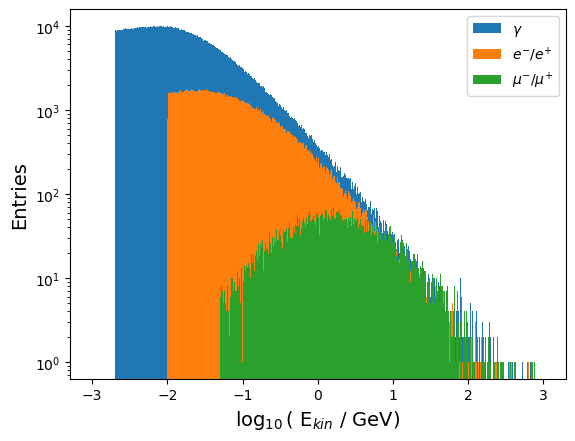

In [68]:
ebins = np.linspace(-3,3,1000)
plt.hist(np.log10(energy_gamma), bins=ebins, label=r'$\gamma$')
plt.hist(np.log10(energy_elec), bins=ebins, label=r'$e^{-}/e^{+}$')
plt.hist(np.log10(energy_mu),bins=ebins, label=r'$\mu^{-}/\mu^{+}$')
plt.yscale('log')
plt.xlabel(r'$\log_{10}$( E$_{kin}$ / GeV)',size=14)
plt.ylabel('Entries',size=14)
plt.legend()

for l in [energy_gamma, energy_elec, energy_mu]: 
    print('Total number of particles: ',len(l))

Text(0.5, 0, 'y / m')

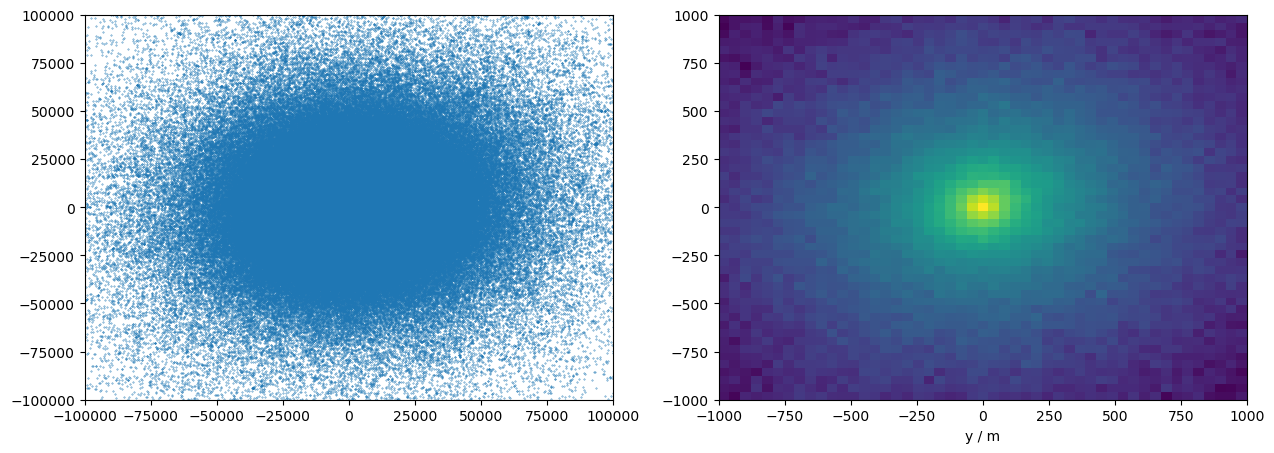

In [74]:
plt.subplots(1,2,figsize=(15,5))

plt.subplot(1,2,1)

plt.scatter(x_coor, y_coor, s=0.1)
plt.xlim(-1e5,1e5)
plt.ylim(-1e5,1e5)

plt.subplot(1,2,2)
xy_bins = np.linspace(-1000,1000)
plt.hist2d(x_coor,y_coor, bins=xy_bins, norm=mpl.colors.LogNorm())
plt.xlabel('x / m')
plt.xlabel('y / m')